# 단순 선형 회귀

# < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

### 필요한 모듈 import

In [1]:
import pandas as pd

# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [2]:
import os

In [3]:
print(os.getcwd())

C:\python\Machine Learning


In [4]:
beer = pd.read_csv('./data/beer.csv')
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


### 데이터 탐색

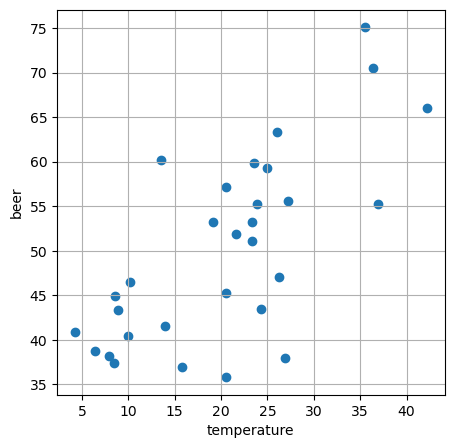

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(x=beer['temperature'], y=beer['beer'])
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()

In [6]:
# 독립 변수 확인
beer.temperature

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [7]:
# 종속 변수 확인, 레코드 수 확인

In [8]:
beer.beer

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64

In [9]:
len(beer)

30

###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [10]:
import numpy as np

#독립변수, 종속변수 데이터셋 준비
X = np.array(beer.temperature).reshape(-1, 1)
y = np.array(beer.beer)

In [11]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
# 학습용, 검증용 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(24, 6, 24, 6)

### 모델 구축

In [13]:
#모델 클래스 선택 후 인스턴스 객체 생성
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [14]:
# 학습 수행
reg = lr.fit(X_train, y_train)

In [15]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
w1 = reg.coef_[0]
w0 = reg.intercept_
w1, w0

(0.6970564800166288, 36.06666541566105)

In [16]:
#회귀식
print(f'y={w1:.2f}x + {w0:.5f}')

y=0.70x + 36.06667


In [17]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test)
y_pred

array([60.81217046, 50.35632326, 54.32954519, 50.35632326, 41.92193985,
       43.17664151])

In [18]:
y_test

array([75.1, 35.8, 47. , 57.2, 37.4, 46.5])

### 모델 성능 평가

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)

In [20]:
#결정계수 R2
r2 = r2_score(y_test, y_pred)

print(mse, rmse, r2)

91.34656925529707 9.557539916489864 0.4845648129795149


### 시각화

In [21]:
np.arange(beer.temperature.min()-1, beer.temperature.max()+1)

array([ 3.2,  4.2,  5.2,  6.2,  7.2,  8.2,  9.2, 10.2, 11.2, 12.2, 13.2,
       14.2, 15.2, 16.2, 17.2, 18.2, 19.2, 20.2, 21.2, 22.2, 23.2, 24.2,
       25.2, 26.2, 27.2, 28.2, 29.2, 30.2, 31.2, 32.2, 33.2, 34.2, 35.2,
       36.2, 37.2, 38.2, 39.2, 40.2, 41.2, 42.2])

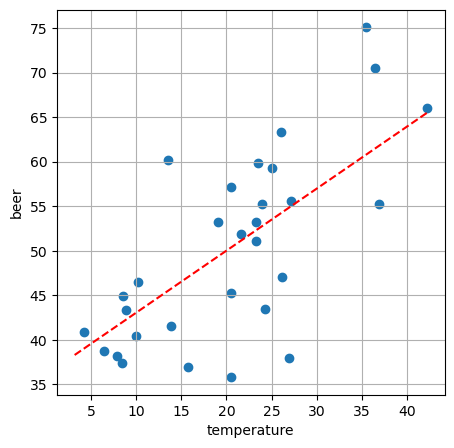

In [22]:
#y = 0.697056X + 36.06 시각화
plt.figure(figsize=(5,5))

xx = np.arange(beer.temperature.min()-1, beer.temperature.max()+1)
yy = reg.predict(xx.reshape(-1, 1))
plt.plot(xx, yy, ls='--', c='red')
plt.xlabel('temperature')
plt.ylabel('beer');

# 수집한 데이터셋 시각화
plt.scatter(beer.temperature, beer.beer)
plt.grid()

# 응용1. 나이, 키의 관계를 회귀 분석

In [23]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 데이터 생성/수집

In [24]:
age_height = pd.read_csv('./data/age_height.csv')
age_height

,age(X),height(T)
0,15.425550,170.910131
1,23.008112,160.675599
2,5.002859,129.002066
3,12.558314,159.701396
4,8.668897,155.460589
5,7.308465,140.561344
6,9.656505,153.654664
7,13.639018,159.429396
8,14.919187,164.704239
9,18.470418,169.645276


#### 데이터 탐색

In [25]:
# 데이터 분포 시각화

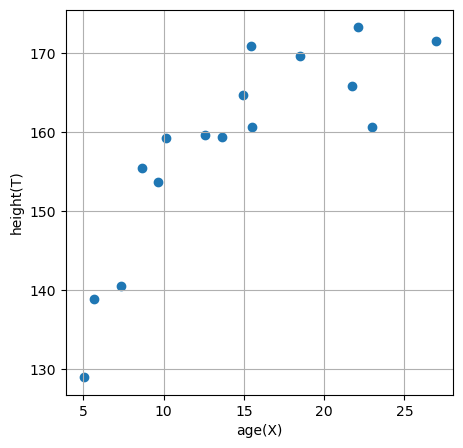

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(age_height['age(X)'], age_height['height(T)'])
plt.xlabel('age(X)')
plt.ylabel('height(T)')
plt.grid()

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [27]:
X = np.array(age_height['age(X)']).reshape(-1,1)
y = np.array(age_height['height(T)'])

In [28]:
X, y

(array([[15.42555012],
        [23.00811234],
        [ 5.00285937],
        [12.55831432],
        [ 8.66889727],
        [ 7.30846487],
        [ 9.65650528],
        [13.63901818],
        [14.91918686],
        [18.47041835],
        [15.47986286],
        [22.13048751],
        [10.11130624],
        [26.95293591],
        [ 5.68468983],
        [21.76168775]]),
 array([170.91013145, 160.67559882, 129.00206616, 159.70139552,
        155.46058905, 140.56134369, 153.65466385, 159.42939554,
        164.70423898, 169.64527574, 160.71257522, 173.28709855,
        159.31193249, 171.51757345, 138.9570433 , 165.8744074 ]))

In [29]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
len(X_train), len(X_test), len(y_train), len(y_test)

(12, 4, 12, 4)

In [31]:
#####모델 구축 및 예측
from sklearn.linear_model import LinearRegression

In [32]:
#모델 객체 생성  및 학습
lr = LinearRegression()
reg = lr.fit(X_train, y_train)

# 예측 수행
y_pred = reg.predict(X_test)
y_pred

array([156.85102159, 177.55962487, 158.40575975, 145.98148132])

In [33]:
#####모델 성능 평가

#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#RMSE : numpy의 sqrt() 함수 사용

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f'mse = {mse:.2f}')

#RMSE
rmse = np.sqrt(mse)
print(f'rmase = {rmse:.2f}')

#결정계수 R2
r2 = r2_score(y_test, y_pred)
print(f'r2_score = {r2:.2f}')

#회귀식
print(f'y = {reg.coef_[0]:.2f}x + {reg.intercept_:.5f}')

mse = 83.49
rmase = 9.14
r2_score = 0.66
y = 1.44x + 138.78419


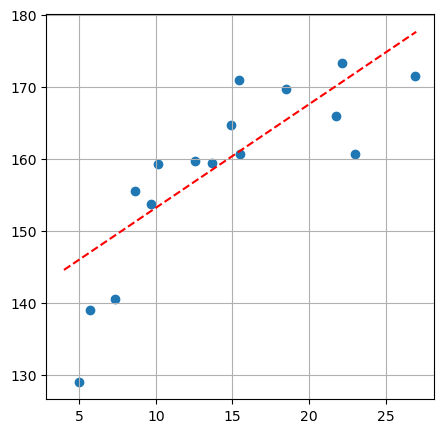

In [34]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화

#y = 0.697056X + 36.06 시각화
plt.figure(figsize=(5,5))
xx = np.arange(age_height['age(X)'].min() - 1, age_height['age(X)'].max() + 1)
yy = reg.predict(xx.reshape(-1,1))

plt.plot(xx, yy, ls='--', c='red')

# 원 데이터 시각화
plt.scatter(age_height['age(X)'], age_height['height(T)'])
plt.grid();

# < 스탯츠모델에서 단순선형회귀 수행>

In [35]:
#스탯츠모델 import
import statsmodels.api as sm

# 맥주 데이터 
# 데이터 생성
beer = pd.read_csv('./data/beer.csv')

#독립변수, 종속변수 데이터셋 준비
X = np.array(beer.temperature).reshape(-1, 1)
y = beer.beer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_test

array([[ 1. , 35.5],
       [ 1. , 20.5],
       [ 1. , 26.2],
       [ 1. , 20.5],
       [ 1. ,  8.4],
       [ 1. , 10.2]])

In [36]:
# 스탯츠모델
lr = sm.OLS(y_train, X_train)
reg = lr.fit()

In [37]:
# 성능 평가
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.63
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           9.50e-05
Time:                        15:18:00   Log-Likelihood:                -79.854
No. Observations:                  24   AIC:                             163.7
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0667      3.315     10.881      0.0

# 응용2: 농어 무게 예측

In [38]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [39]:
from sklearn.model_selection import train_test_split

X = perch_length.reshape(-1, 1)
y = perch_weight

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
reg = lr.fit(X_train, y_train)

In [41]:
print(lr.coef_, lr.intercept_)

[35.63110638] -618.3317511711566


In [42]:
y_pred = reg.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmes = np.sqrt(mse)
print(mse)
print(rmse)
r2 = r2_score(y_test, y_pred)
print(r2)

14550.23701560241
9.137551455552217
0.8803330236667549


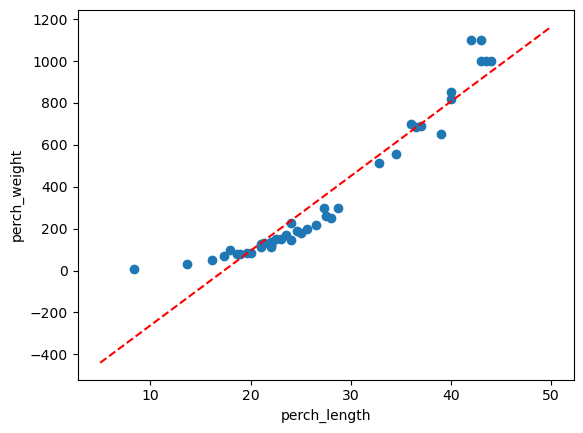

In [44]:
# 시각화
import matplotlib.pyplot as plt

plt.scatter(X_train.reshape(-1), y_train);

xx = [5, 50]
y1 = 5 * reg.coef_[0] + reg.intercept_
y2 = 50 * reg.coef_[0] + reg.intercept_

plt.plot(xx, [y1, y2], ls='--', c='red')
plt.xlabel('perch_length')
plt.ylabel('perch_weight');

# 응용3: 보스턴 집값 선형 회귀

In [45]:
from sklearn import datasets

datasets.fetch_openml('boston')

C:\Users\wkddl\AppData\Roaming\Python\Python39\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\wkddl\AppData\Roaming\Python\Python39\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

### 데이터 수집

In [46]:
# from sklearn.datasets import load_boston

# boston = load_boston()
from sklearn import datasets
boston = datasets.fetch_openml('boston')

C:\Users\wkddl\AppData\Roaming\Python\Python39\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\wkddl\AppData\Roaming\Python\Python39\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### 데이터 탐색

In [47]:
dir(boston)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [48]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [49]:
print(boston.data[:5])

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [50]:
print(boston.target[:5])

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [51]:
print(boston.feature_names)
print(boston.target_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
['MEDV']


### 데이터 준비

In [52]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환

In [53]:
import pandas as pd

X = boston.data.RM
y = boston.target

X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

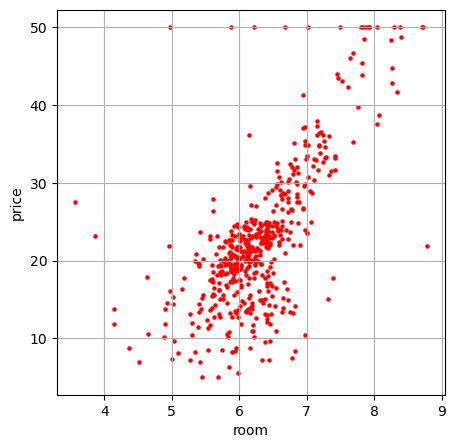

In [54]:
#데이터 탐색
# RM과 MEDV의 관계 시각화
plt.figure(figsize=(5, 5,))
plt.scatter(X, y, s=5, c='red')
plt.xlabel('room')
plt.ylabel('price')
plt.grid()

### 학습용/ 검증용 데이터 분리

In [55]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라
from sklearn.model_selection import train_test_split

X = np.array(X).reshape(-1, 1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

### 모델 구축

In [56]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
reg = lr.fit(X_train, y_train)

### 모델 평가

In [57]:
y_pred = reg.predict(X_test)

In [58]:
# MSE
mse = mean_squared_error(y_test, y_pred)
print(f'mse = {mse:.3f}')

# RMSE
rmse = np.sqrt(mse)
print(f'rmse = {rmse:.3f}')

# 결정계수 R2
r2 = r2_score(y_test, y_pred)
print(f'r2 = {r2:.3f}')

# 회귀 계수 및 절편 확인
print(f'coef = {reg.coef_[0]:.2f}')
print(f'intercept = {reg.intercept_:.2f}')

mse = 36.517
rmse = 6.043
r2 = 0.602
coef = 8.46
intercept = -30.57


### 시각화

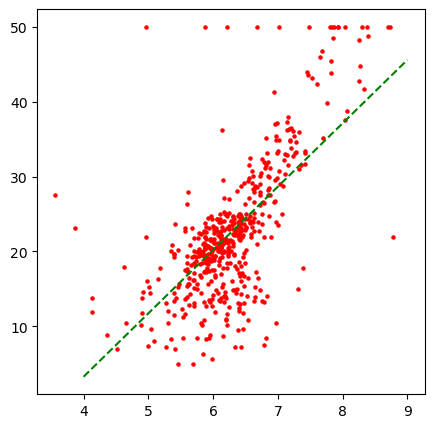

In [67]:
plt.figure(figsize = (5,5))
plt.scatter(X, y, s=5, c='r')

xx = np.linspace(4, 9)
yy = reg.predict(xx.reshape(-1, 1))
plt.plot(xx, yy, ls='--', c='g');